<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


    close        rsi
0     100        NaN
1     101        NaN
2     102        NaN
3     101        NaN
4     100        NaN
5      99        NaN
6      98        NaN
7      97        NaN
8      96        NaN
9      97        NaN
10     98        NaN
11     99        NaN
12    100        NaN
13    101  59.928522
14    102  64.361548
15    103  68.155439
16    104  71.430730
17    105  74.279626


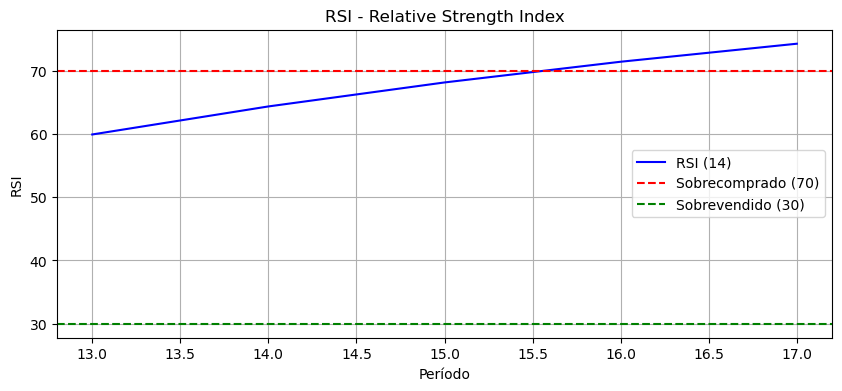

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o RSI
def calculate_rsi(close, period=14):
    delta = close.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, min_periods=period, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 🔢 Lista fictícia de preços de fechamento
prices = [100, 101, 102, 101, 100, 99, 98, 97, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]

# Criar DataFrame
df = pd.DataFrame({'close': prices})

# Calcular o RSI
df['rsi'] = calculate_rsi(df['close'], period=14)

# Exibir os dados
print(df)

# 📈 Plot do RSI
plt.figure(figsize=(10, 4))
plt.plot(df['rsi'], label='RSI (14)', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Sobrecomprado (70)')
plt.axhline(30, color='green', linestyle='--', label='Sobrevendido (30)')
plt.title('RSI - Relative Strength Index')
plt.xlabel('Período')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()

In [22]:
df = pd.read_excel('teste.xlsx')

In [23]:
df['rsi1'] = df.ta.rsi(length=3)
df['rsi2'] = calculate_rsi(df['close'], period=3)

In [24]:
df

,safra,close,rsi,gains,losses,avg gaubs,avg losses,RS,RSI,ser,rsi1,rsi2
0,2019-04-11 09:00:00,3840.5,96.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-11 09:05:00,3843.0,97.003,2.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-04-11 09:10:00,3842.5,90.228,0.0,0.5,0.833333,0.166667,5.000000,83.333333,83.333333,NaN,76.923077
3,2019-04-11 09:15:00,3844.5,93.114,2.0,0.0,1.500000,0.166667,9.000000,90.000000,90.000000,90.000000,90.322581
4,2019-04-11 09:20:00,3845.0,93.800,0.5,0.0,0.833333,0.166667,5.000000,83.333333,83.333333,91.304348,92.052980
5,2019-04-11 09:25:00,3844.5,81.598,0.0,0.5,0.833333,0.166667,5.000000,83.333333,83.333333,76.363636,72.584856
6,2019-04-11 09:30:00,3847.5,91.523,3.0,0.0,1.166667,0.166667,7.000000,87.500000,87.500000,90.441176,90.557554
7,2019-04-11 09:35:00,3848.0,92.530,0.5,0.0,1.166667,0.166667,7.000000,87.500000,87.500000,91.680000,91.887193
8,2019-04-11 09:40:00,3847.0,68.215,0.0,1.0,1.166667,0.333333,3.500000,77.777778,77.777778,66.013825,64.598045
9,2019-04-11 09:45:00,3844.0,31.255,0.0,3.0,0.166667,1.333333,0.125000,11.111111,11.111111,29.212337,27.648136
